# Paper 1: k-Nearest Neighbours Classifier

https://ieeexplore.ieee.org/abstract/document/9376820/figures#figures

In [1]:
# Import libraries and read data
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

df = pd.read_csv('mushrooms.csv')

In [2]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
# Data cleaning
df = df.apply(lambda x: x.astype('category'))
df = df.apply(lambda x: x.cat.codes)

In [5]:
# Split data into features and labels
x = df.loc[:, df.columns != 'class']
y = df['class']

In [6]:
# Split the data into training and testing subsets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.5, random_state=0)

In [7]:
# Train the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Score the model
model.score(x_test, y_test)

0.999015263417036

In [9]:
# Make a modification to the model
knn_scores = {}
# Key: k, Value: score

for k in range(2, 501):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    knn_scores[k] = score

knn_scores_df = pd.DataFrame.from_dict(knn_scores, orient="index", columns=["score"])

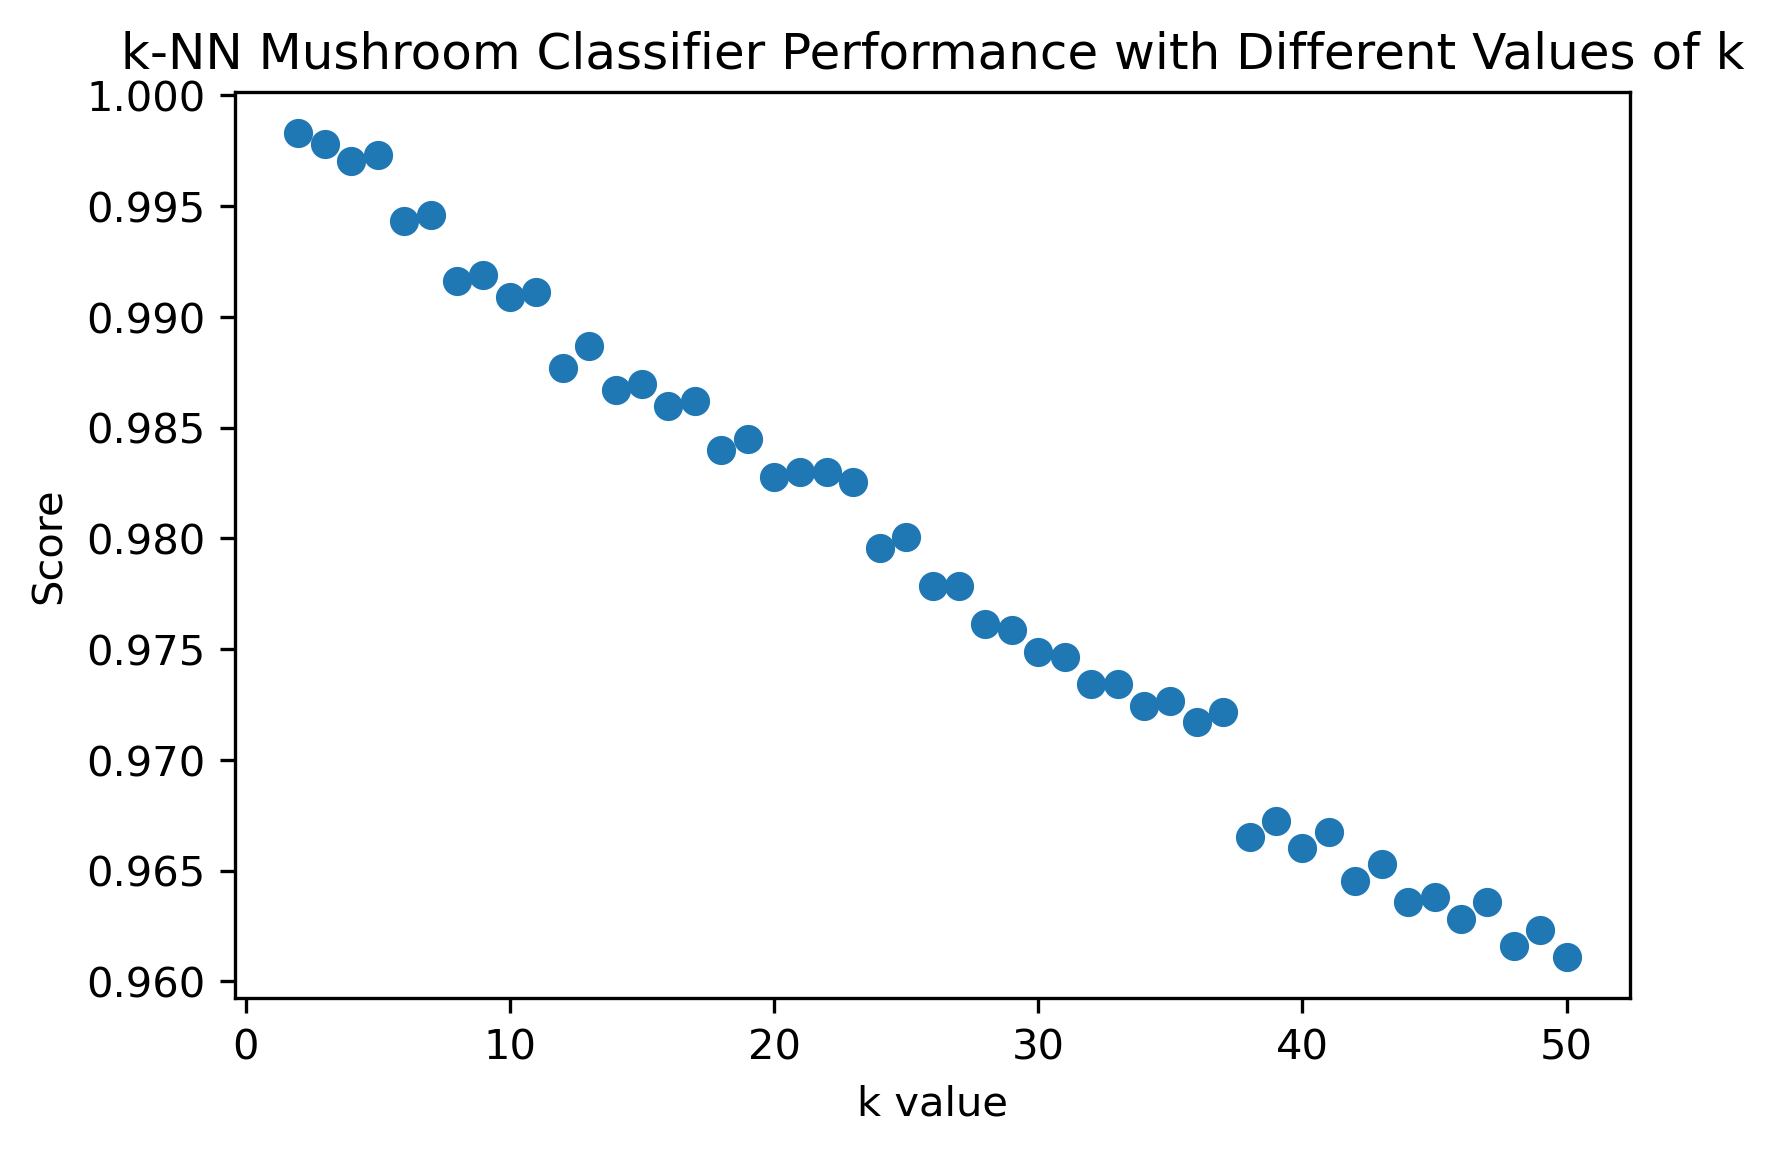

In [10]:
fig, ax = plt.subplots()
scatter = ax.scatter(range(2, 51), knn_scores_df['score'][2:51])

ax.set_title('k-NN Mushroom Classifier Performance with Different Values of k')
ax.set_ylabel('Score')
ax.set_xlabel('k value')

plt.show()

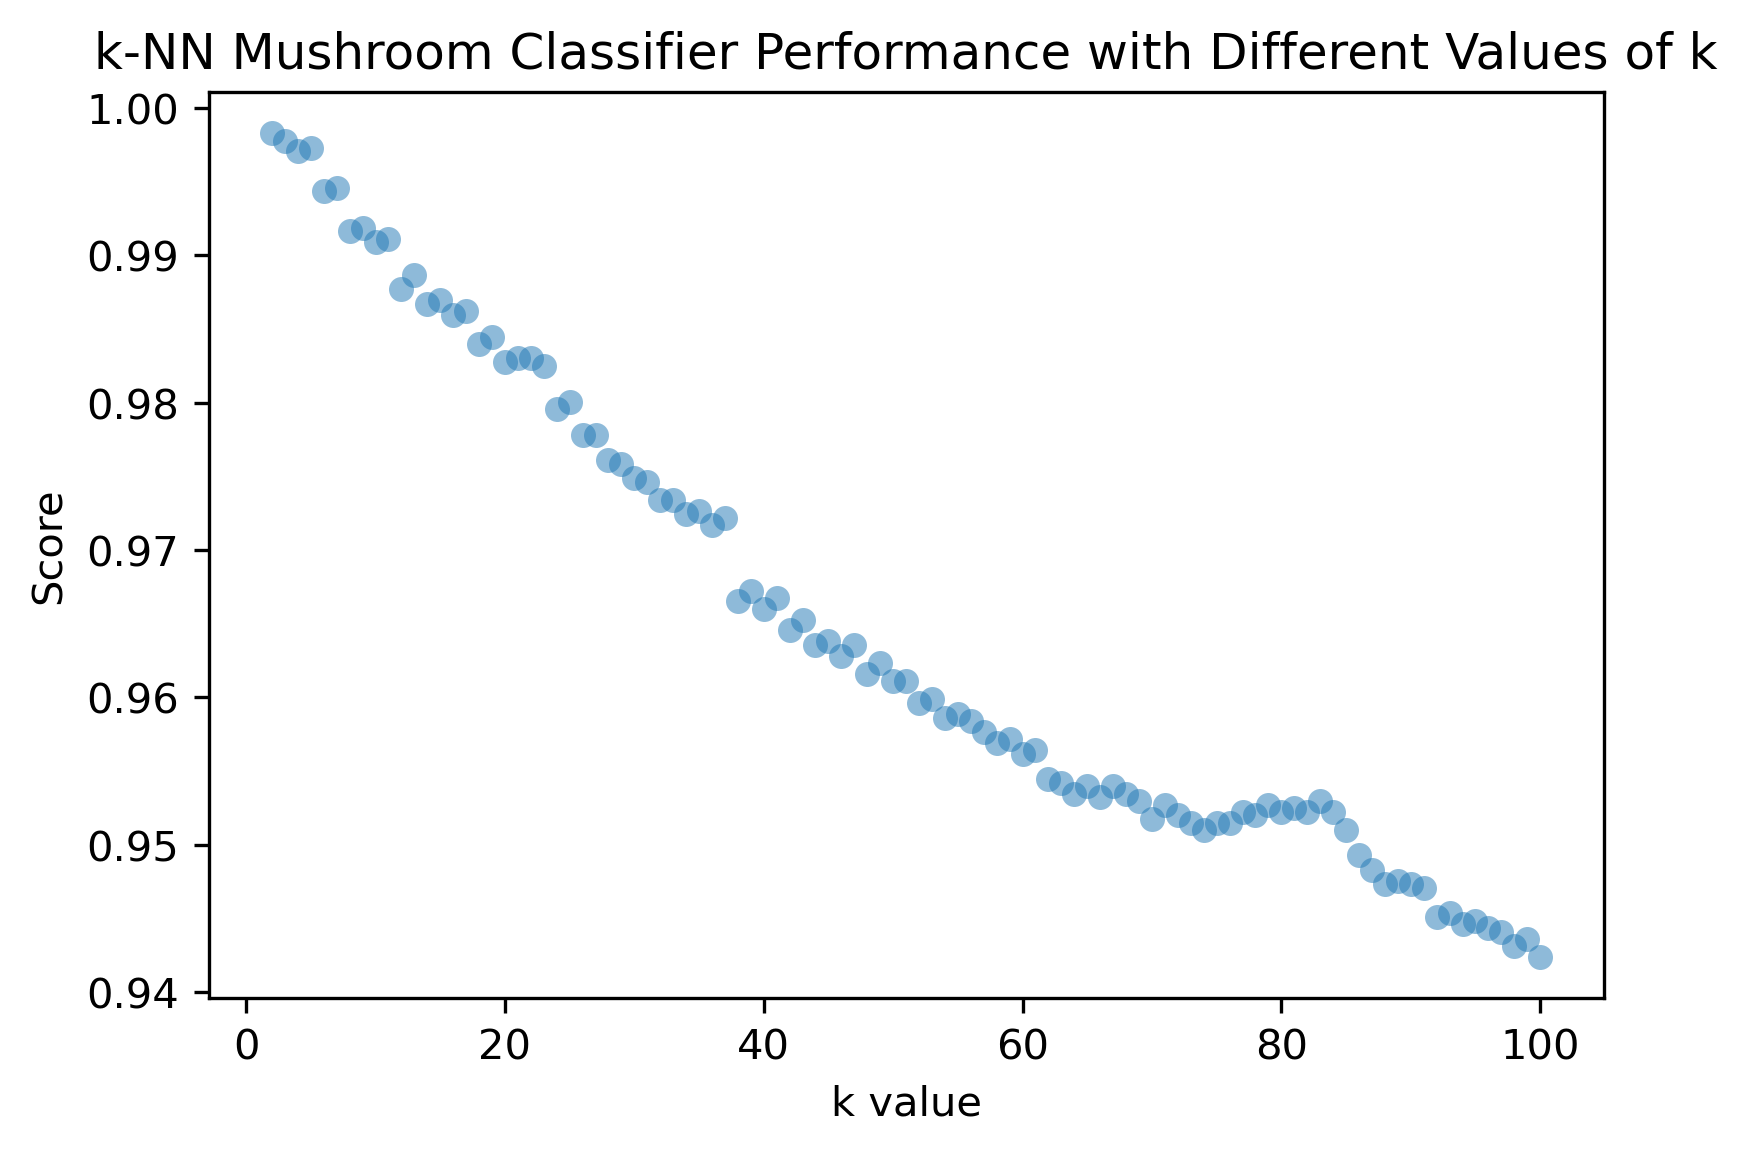

In [11]:
fig, ax = plt.subplots()
scatter = ax.scatter(range(2, 101), knn_scores_df['score'][2:101], alpha=0.5, linewidths=0)

ax.set_title('k-NN Mushroom Classifier Performance with Different Values of k')
ax.set_ylabel('Score')
ax.set_xlabel('k value')

plt.show()

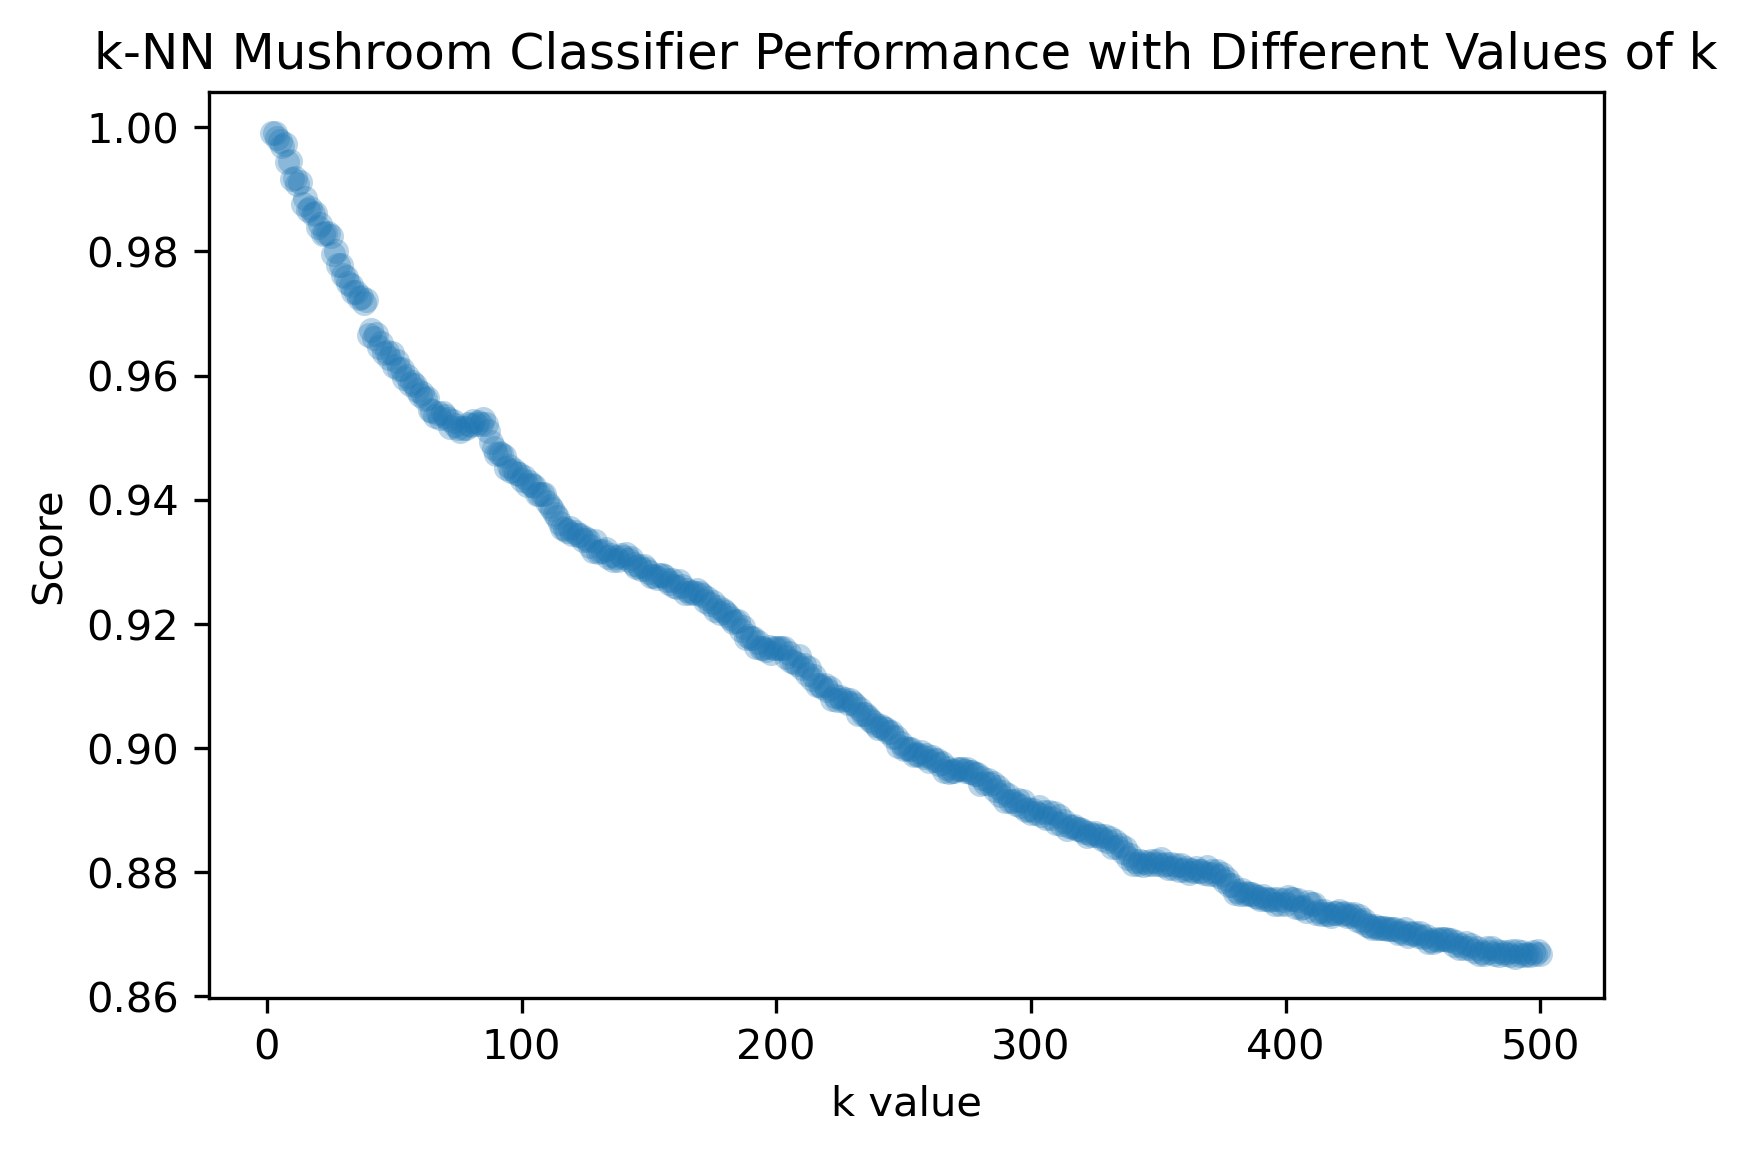

In [12]:
fig, ax = plt.subplots()
scatter = ax.scatter(range(2, 501), knn_scores_df['score'], alpha=0.3, linewidths=0)

ax.set_title('k-NN Mushroom Classifier Performance with Different Values of k')
ax.set_ylabel('Score')
ax.set_xlabel('k value')

plt.show()